In [1]:
import time
import matplotlib.pyplot as plt
from langgraph.graph import StateGraph, END
from typing import TypedDict

In [2]:
class SignalState(TypedDict):
    signal: str

In [3]:
def red_light(state: SignalState) -> SignalState:
    draw_signal("RED")
    time.sleep(1)
    return {"signal": "green"}
def green_light(state: SignalState) -> SignalState:
    draw_signal("GREEN")
    time.sleep(1)
    return {"signal": "yellow"}

def yellow_light(state: SignalState) -> SignalState:
    draw_signal("YELLOW")
    time.sleep(1)
    return {"signal": "red"}

In [4]:
def draw_signal(color):
    colors = {"RED": "red", "YELLOW": "yellow", "GREEN": "green"}
    fig, ax = plt.subplots(figsize=(2, 4))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 3)
    plt.axis('off')

    # Draw 3 circles
    for i, c in enumerate(["red", "yellow", "green"]):
        circle_color = colors[color] if c.upper() == color else "lightgray"
        ax.add_patch(plt.Circle((0.5, 2.5 - i), 0.3, color=circle_color, ec="black"))

    ax.set_title(f"Signal: {color}", fontsize=12)
    plt.tight_layout()
    plt.pause(5)  # Needed to show live updates
    plt.clf()

In [5]:
builder = StateGraph(SignalState)
builder.add_node("red", red_light)
builder.add_node("green", green_light)
builder.add_node("yellow", yellow_light)

# Define loop
builder.set_entry_point("red")
builder.add_edge("red", "green")
builder.add_edge("green", "yellow")
builder.add_edge("yellow", "red")  # Loop


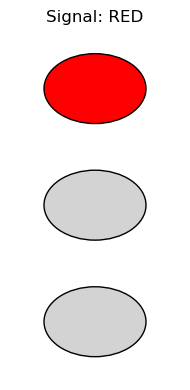

<Figure size 640x480 with 0 Axes>

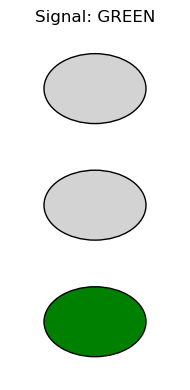

<Figure size 640x480 with 0 Axes>

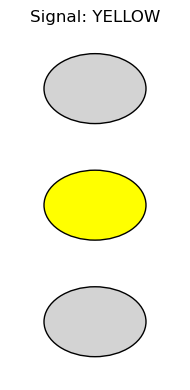

<Figure size 640x480 with 0 Axes>

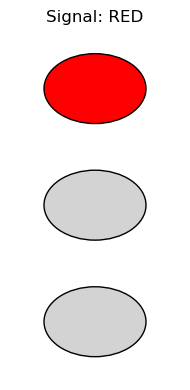

<Figure size 640x480 with 0 Axes>

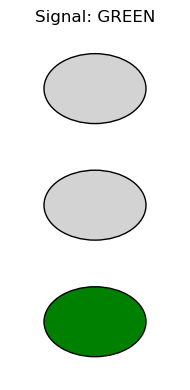

<Figure size 640x480 with 0 Axes>

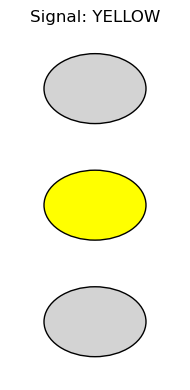

<Figure size 640x480 with 0 Axes>

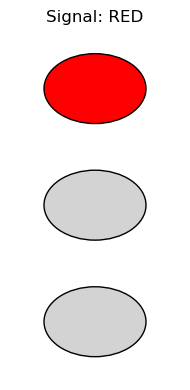

<Figure size 640x480 with 0 Axes>

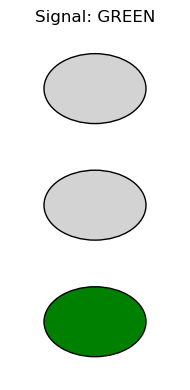

KeyboardInterrupt: 

In [6]:
graph = builder.compile()

# Step 5: Run the simulation for N cycles
state = {"signal": "red"}
plt.ion()  # Interactive mode on
for _ in range(6):  # Run 2 full signal cycles
    state = graph.invoke(state)
plt.ioff()